# gRPC interceptor benchmarking results analysis

In [6]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & clean the data

Path to two datasets: optimal and suboptimal

In [7]:
optimal_path = '../results_0000.csv'
suboptimal_path = '../results_1011.csv'

In [8]:
data = pd.read_csv(optimal_path)
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data['Average Latency'] = data['Average Latency'].apply(convert_latency_to_ms)
data['Max Latency'] = data['Max Latency'].apply(convert_latency_to_ms)
data['Min Latency'] = data['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

,Timestamp,Total Requests,Concurrent Requests,Average Latency,Max Latency,Min Latency,Avg. Throughput req/s,Time Elapsed
0,2024-01-29 15:51:29.232840251 +0000 UTC m=+18....,0,0,0.000000,0.000000,0.000000,0.000000,0
1,2024-01-29 15:52:00.560615051 +0000 UTC m=+50....,100000,1,0.309119,10.157810,0.175555,3234.998458,31.324071485s
2,2024-01-29 15:52:19.118192646 +0000 UTC m=+68....,100000,2,0.365666,3.510069,0.165500,2734.735431,18.553422741s
3,2024-01-29 15:52:33.197353116 +0000 UTC m=+82....,100000,3,0.416141,3.616407,0.164575,2403.031008,14.074235516s
4,2024-01-29 15:52:44.261136484 +0000 UTC m=+93....,100000,4,0.435781,5.147494,0.172570,2294.728231,11.059191641s
5,2024-01-29 15:52:54.056525366 +0000 UTC m=+103...,100000,5,0.482433,4.269935,0.174455,2072.823650,9.791870099s
6,2024-01-29 15:53:02.71154691 +0000 UTC m=+112....,100000,6,0.511383,3.661470,0.159664,1955.479767,8.651489173s
7,2024-01-29 15:53:10.584721947 +0000 UTC m=+120...,100000,7,0.542458,3.048941,0.158618,1843.459748,7.869473893s
8,2024-01-29 15:53:17.951416149 +0000 UTC m=+127...,100000,8,0.580261,3.609160,0.171795,1723.361839,7.363163481s
9,2024-01-29 15:53:24.981510586 +0000 UTC m=+134...,100000,9,0.622512,4.525304,0.172016,1606.394675,7.026047975s


In [9]:
data_suboptimal = pd.read_csv(suboptimal_path)
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data_suboptimal['Average Latency'] = data_suboptimal['Average Latency'].apply(convert_latency_to_ms)
data_suboptimal['Max Latency'] = data_suboptimal['Max Latency'].apply(convert_latency_to_ms)
data_suboptimal['Min Latency'] = data_suboptimal['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

,Timestamp,Total Requests,Concurrent Requests,Average Latency,Max Latency,Min Latency,Avg. Throughput req/s,Time Elapsed
0,2024-01-29 15:51:29.232840251 +0000 UTC m=+18....,0,0,0.000000,0.000000,0.000000,0.000000,0
1,2024-01-29 15:52:00.560615051 +0000 UTC m=+50....,100000,1,0.309119,10.157810,0.175555,3234.998458,31.324071485s
2,2024-01-29 15:52:19.118192646 +0000 UTC m=+68....,100000,2,0.365666,3.510069,0.165500,2734.735431,18.553422741s
3,2024-01-29 15:52:33.197353116 +0000 UTC m=+82....,100000,3,0.416141,3.616407,0.164575,2403.031008,14.074235516s
4,2024-01-29 15:52:44.261136484 +0000 UTC m=+93....,100000,4,0.435781,5.147494,0.172570,2294.728231,11.059191641s
5,2024-01-29 15:52:54.056525366 +0000 UTC m=+103...,100000,5,0.482433,4.269935,0.174455,2072.823650,9.791870099s
6,2024-01-29 15:53:02.71154691 +0000 UTC m=+112....,100000,6,0.511383,3.661470,0.159664,1955.479767,8.651489173s
7,2024-01-29 15:53:10.584721947 +0000 UTC m=+120...,100000,7,0.542458,3.048941,0.158618,1843.459748,7.869473893s
8,2024-01-29 15:53:17.951416149 +0000 UTC m=+127...,100000,8,0.580261,3.609160,0.171795,1723.361839,7.363163481s
9,2024-01-29 15:53:24.981510586 +0000 UTC m=+134...,100000,9,0.622512,4.525304,0.172016,1606.394675,7.026047975s


## Plotting
### Optimal Conditions (all incersceptors disabled)

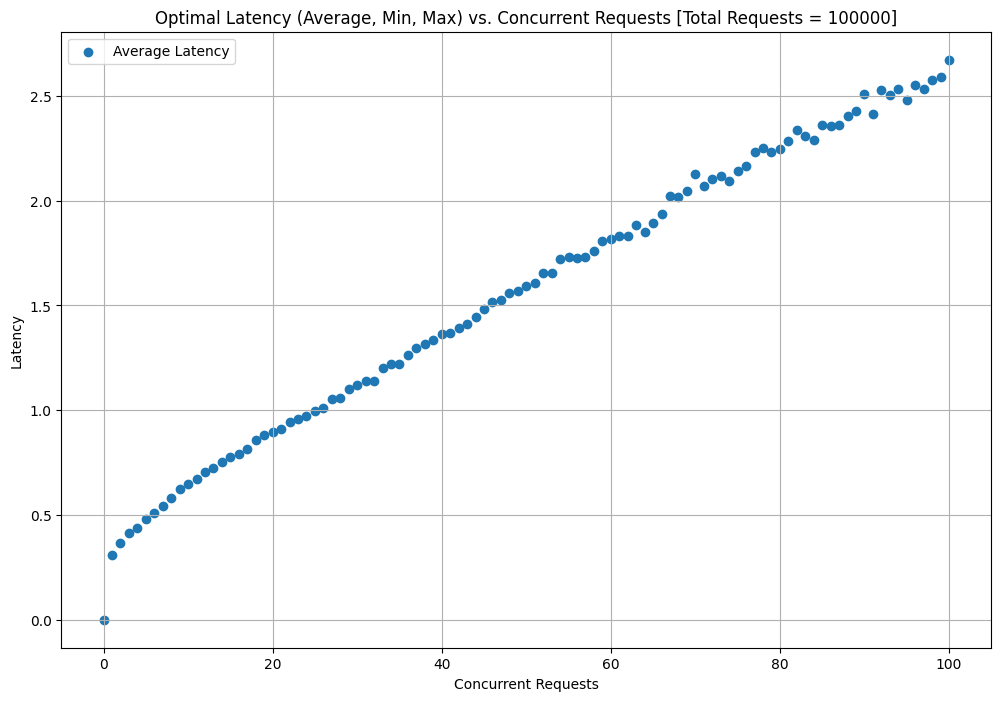

In [10]:
# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.scatter(data['Concurrent Requests'], data['Average Latency'], marker='o', label='Average Latency')
# plt.plot(data['Concurrent Requests'], data['Min Latency (ms)'], marker='x', linestyle='--', label='Min Latency')
# plt.plot(data['Concurrent Requests'], data['Max Latency (ms)'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Optimal Latency (Average, Min, Max) vs. Concurrent Requests [Total Requests = ' + str(data["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()

### Suboptimal results (all interceptors disabled)

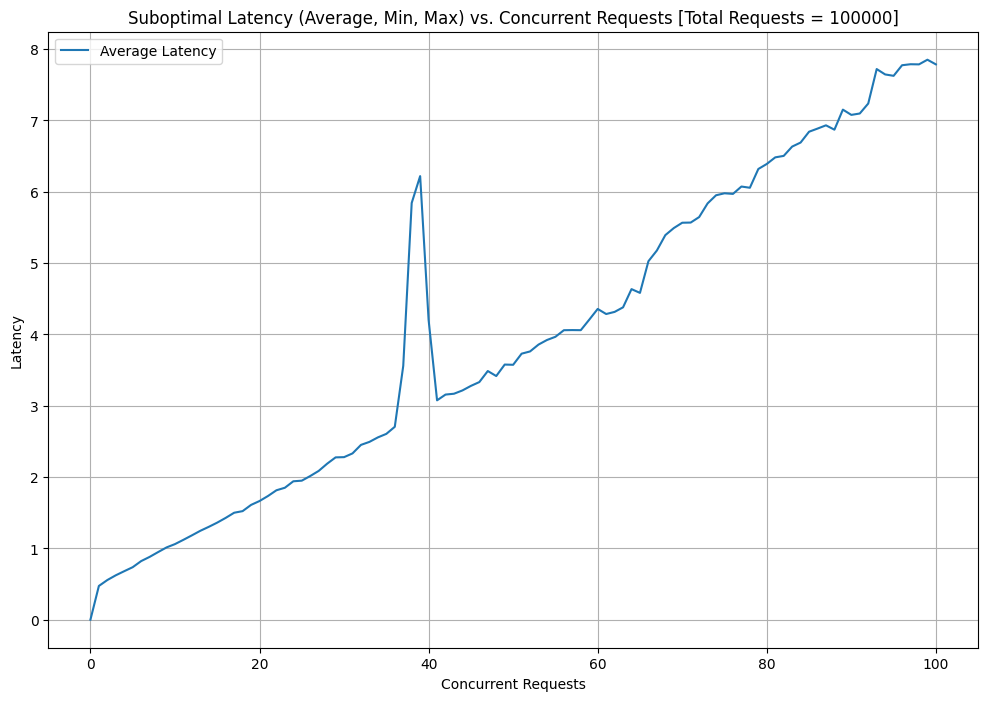

In [11]:
# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency'], label='Average Latency')
# plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Min Latency'], marker='x', linestyle='--', label='Min Latency')
# plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Max Latency'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Suboptimal Latency (Average, Min, Max) vs. Concurrent Requests [Total Requests = ' + str(data_suboptimal["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()


## Combine optimal and suboptimal in one plot
### Average Latency

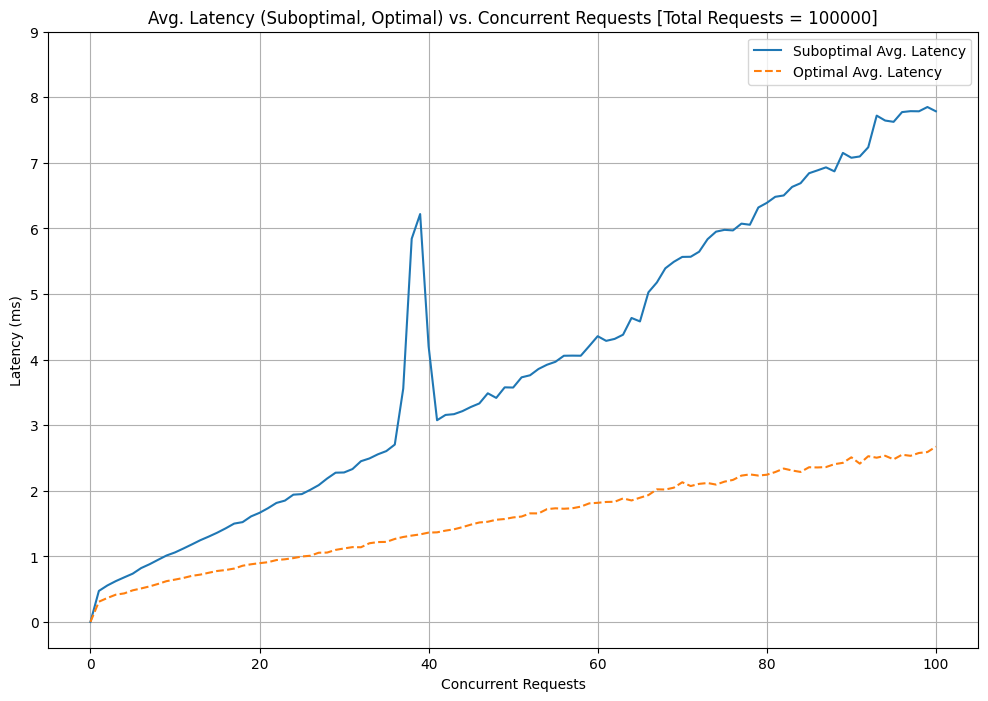

In [12]:
# Plotting Optimal and Suboptimal Average Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency'], label='Suboptimal Avg. Latency')
plt.plot(data['Concurrent Requests'], data['Average Latency'], linestyle='--', label='Optimal Avg. Latency')

plt.title('Avg. Latency (Suboptimal, Optimal) vs. Concurrent Requests [Total Requests = ' + str(data["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.yticks(np.arange(0, 10, 1))
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Concurrent Requests', ylabel='Average Latency'>

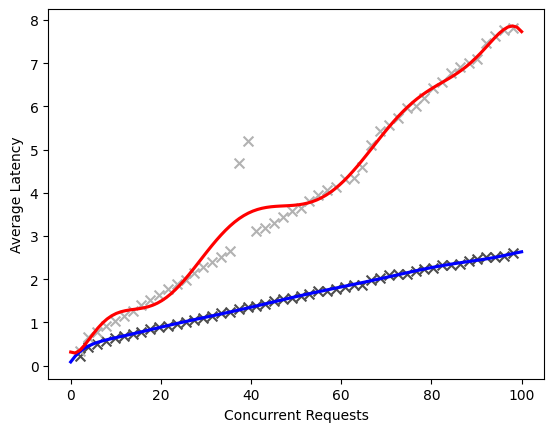

In [13]:
sns.regplot(x='Concurrent Requests',
            y='Average Latency',
            data=data,
            label='Optimal Avg. Latency',
            fit_reg=True,
            x_bins=50,
            ci=None, marker="x",
            color=".3",
            line_kws=dict(color="b"),
            order = 10)
sns.regplot(x='Concurrent Requests',
            y='Average Latency',
            data=data_suboptimal,
            label='Suboptimal Avg. Latency',
            fit_reg=True,
            x_bins=50,
            ci=None,
            marker="x",
            color=".7",
            line_kws=dict(color="r"),
            order = 10)

### Minimum Latency

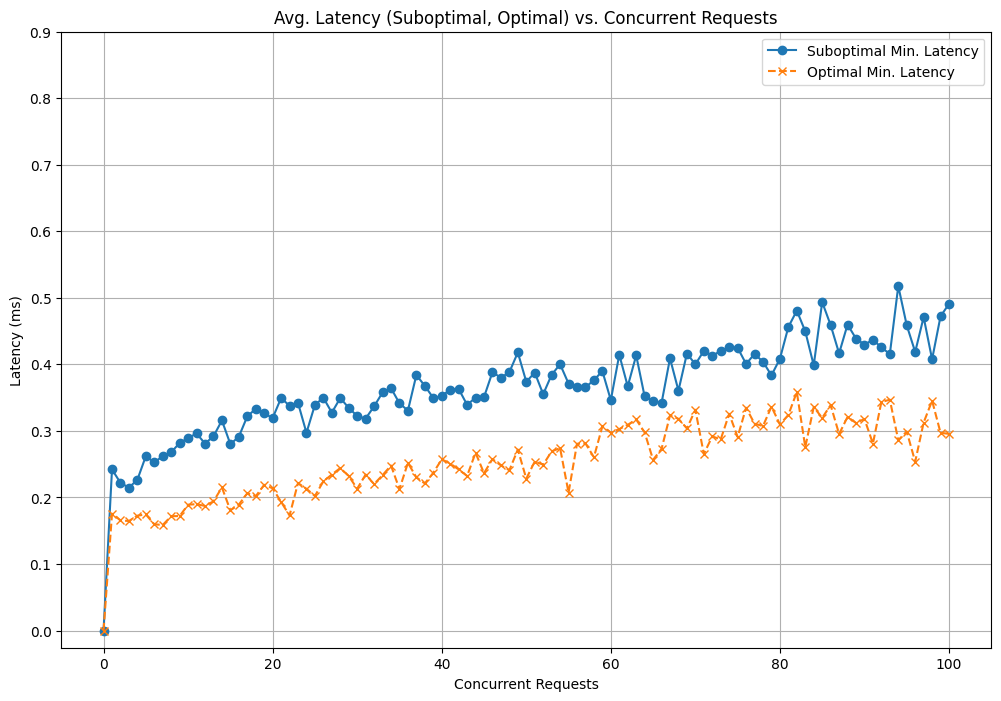

In [14]:
# Plotting Optimal and Suboptimal Minimum Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Min Latency'], marker='o', label='Suboptimal Min. Latency')
plt.plot(data['Concurrent Requests'], data['Min Latency'], marker='x', linestyle='--', label='Optimal Min. Latency')

plt.title('Avg. Latency (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

### Throughput

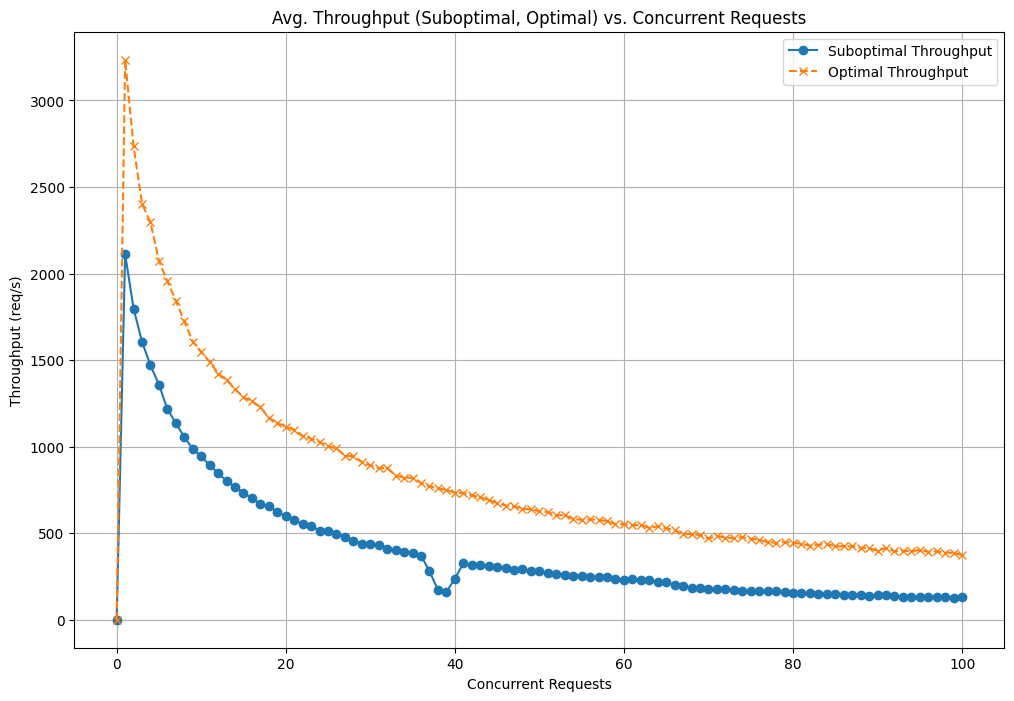

In [15]:
# Plotting Optimal and Suboptimal Minimum Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Avg. Throughput req/s'], marker='o', label='Suboptimal Throughput')
plt.plot(data['Concurrent Requests'], data['Avg. Throughput req/s'], marker='x', linestyle='--', label='Optimal Throughput')

plt.title('Avg. Throughput (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Throughput (req/s)')
# plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Concurrent Requests', ylabel='Avg. Throughput req/s'>

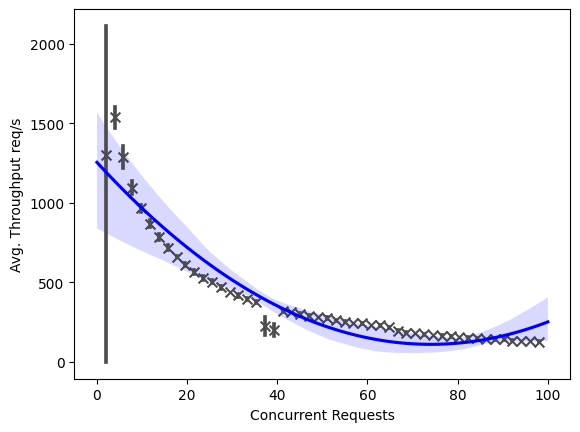

In [16]:
sns.regplot(x='Concurrent Requests', y='Avg. Throughput req/s', data=data_suboptimal, fit_reg=True, x_bins=50, ci=99, marker="x", color=".3", line_kws=dict(color="b"), order = 2)

# Pandas
### rolling average

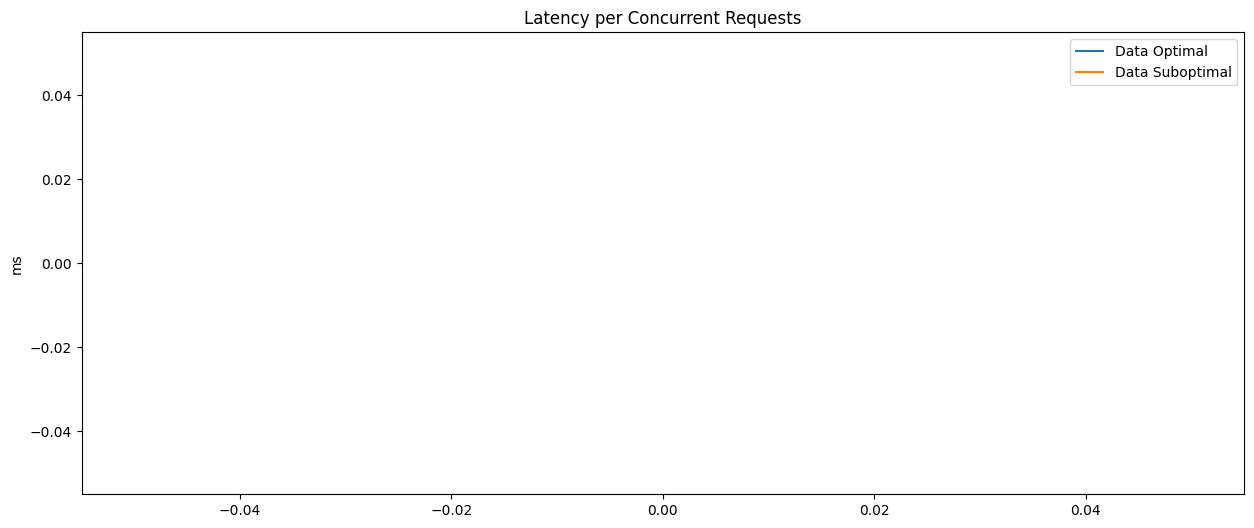

In [17]:
# Slice the data to start from the 1001st data point
data_sliced = data.iloc[2000:]
data_suboptimal_sliced = data_suboptimal.iloc[2000:]

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting
data_sliced['Average Latency'].rolling(200).mean().plot(label='Data Optimal')
data_suboptimal_sliced['Average Latency'].rolling(200).mean().plot(label='Data Suboptimal')

# Add title and y-axis label
plt.title("Latency per Concurrent Requests")
plt.ylabel("ms")

# Add legend
plt.legend()

# Show plot
plt.show()